# Data Preprocessing

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("plant_growth_data.csv")

In [3]:
df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0
...,...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0
191,sandy,8.273000,daily,organic,27.900000,69.500000,1


In [4]:
df['Soil_Type'].value_counts()

Soil_Type
clay     67
sandy    64
loam     62
Name: count, dtype: int64

In [5]:
df['Sunlight_Hours'].value_counts()

Sunlight_Hours
7.528000    2
6.917000    2
6.127000    2
4.118000    1
7.456000    1
           ..
7.112744    1
8.218114    1
6.181778    1
9.830692    1
6.732000    1
Name: count, Length: 190, dtype: int64

In [6]:
df['Water_Frequency'].value_counts()

Water_Frequency
daily        74
bi-weekly    60
weekly       59
Name: count, dtype: int64

In [7]:
df['Fertilizer_Type'].value_counts()

Fertilizer_Type
none        74
chemical    65
organic     54
Name: count, dtype: int64

In [8]:
df['Temperature'].value_counts()

Temperature
31.700000    2
22.000000    2
30.000000    2
27.900000    2
31.719602    1
            ..
20.637095    1
17.363297    1
28.934743    1
27.578857    1
21.700000    1
Name: count, Length: 189, dtype: int64

In [11]:
df['Humidity'].value_counts()

Humidity
70.000000    2
55.000000    2
61.591861    1
49.700000    1
73.600000    1
            ..
61.469932    1
64.787434    1
52.727053    1
61.377904    1
56.900000    1
Name: count, Length: 191, dtype: int64

In [12]:
df['Growth_Milestone'].value_counts()

Growth_Milestone
0    97
1    96
Name: count, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [14]:
print(df.isnull().sum())

Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64


In [15]:
from sklearn.preprocessing import LabelEncoder
obj_cols=['Soil_Type', 'Sunlight_Hours', 'Water_Frequency', 'Fertilizer_Type',
       'Temperature', 'Humidity', 'Growth_Milestone']

In [16]:
print(df.duplicated().sum())

0


In [17]:
df.describe()

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone
count,193.000000,193.000000,193.000000,193.000000
mean,6.826484,25.076087,58.098927,0.497409
std,1.599509,5.354170,12.631799,0.501294
min,4.033133,15.200000,30.567682,0.000000
25%,5.477000,20.637095,49.300000,0.000000
50%,6.833290,25.912336,59.182806,0.000000
75%,8.241144,29.757938,69.100000,1.000000
max,9.913903,34.810103,79.648240,1.000000


In [18]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 193, Columns: 7


In [19]:
print(f"Duplicates: {df.duplicated().sum()}") 

Duplicates: 0


In [20]:
print(f"missing data: {sum(df.isna().sum())}")

missing data: 0


In [21]:
df.tail()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
188,sandy,5.652,daily,none,28.0,70.2,0
189,clay,7.528,weekly,chemical,30.5,60.1,1
190,loam,4.934,bi-weekly,none,24.5,61.7,0
191,sandy,8.273,daily,organic,27.9,69.5,1
192,clay,6.732,weekly,none,21.7,56.9,0


In [22]:
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mapping1 = {'clay':0,'sandy':1,'loam':2}
mapping2 = {'daily':0,'bi-weekly':1,'weekly':2}
mapping3 = {'none':0,'chemical':1,'organic':2}
df['Soil_Type'] = le.fit_transform(df['Soil_Type'].map(mapping1))
df['Water_Frequency'] = le.fit_transform(df['Water_Frequency'].map(mapping2))
df['Fertilizer_Type'] = le.fit_transform(df['Fertilizer_Type'].map(mapping3))
df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,2,5.192294,1,1,31.719602,61.591861,0
1,1,4.033133,2,2,28.919484,52.422276,1
2,2,8.892769,1,0,23.179059,44.660539,0
3,2,8.241144,1,0,18.465886,46.433227,0
4,1,8.374043,1,2,18.128741,63.625923,0
...,...,...,...,...,...,...,...
188,1,5.652000,0,0,28.000000,70.200000,0
189,0,7.528000,2,1,30.500000,60.100000,1
190,2,4.934000,1,0,24.500000,61.700000,0
191,1,8.273000,0,2,27.900000,69.500000,1


# Data Visulization

In [24]:
import seaborn as sns

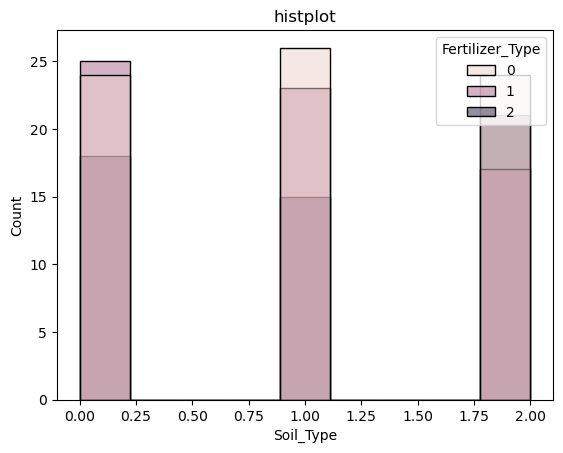

In [27]:
import seaborn as sns
sns.histplot(x='Soil_Type', hue='Fertilizer_Type', data=df)
plt.title('histplot')
plt.show()

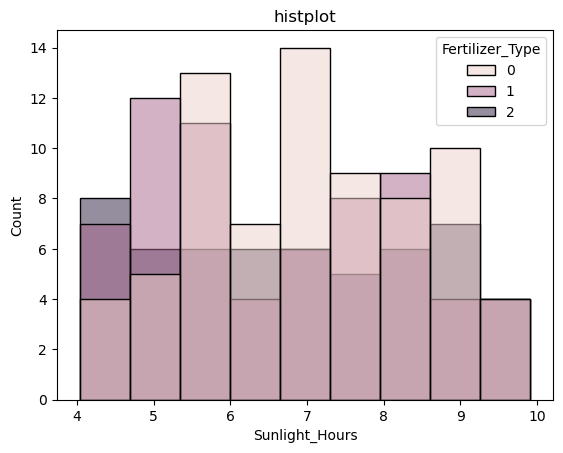

In [28]:
import seaborn as sns
sns.histplot(x='Sunlight_Hours', hue='Fertilizer_Type', data=df)
plt.title('histplot')
plt.show()

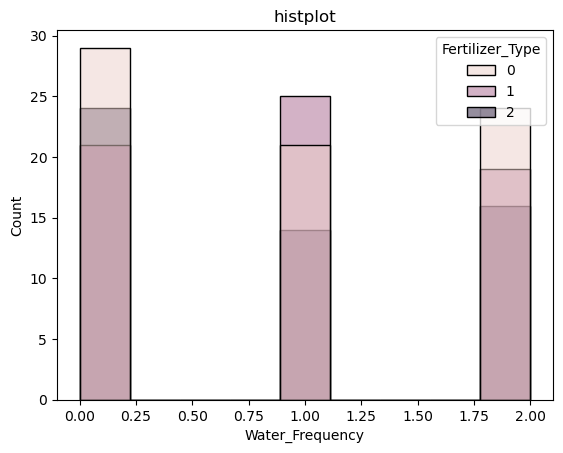

In [29]:
import seaborn as sns
sns.histplot(x='Water_Frequency', hue='Fertilizer_Type', data=df)
plt.title('histplot')
plt.show()

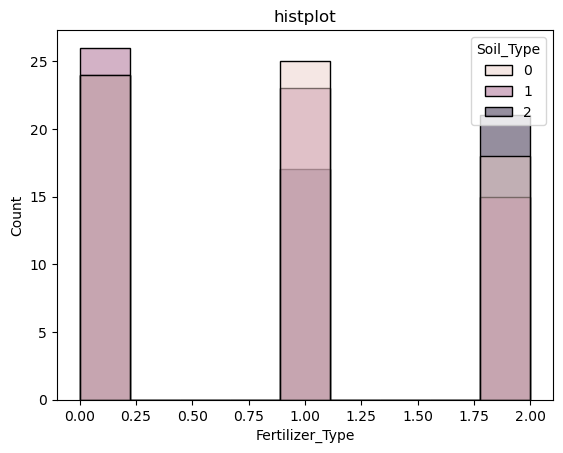

In [30]:
import seaborn as sns
sns.histplot(x='Fertilizer_Type', hue='Soil_Type', data=df)
plt.title('histplot')
plt.show()

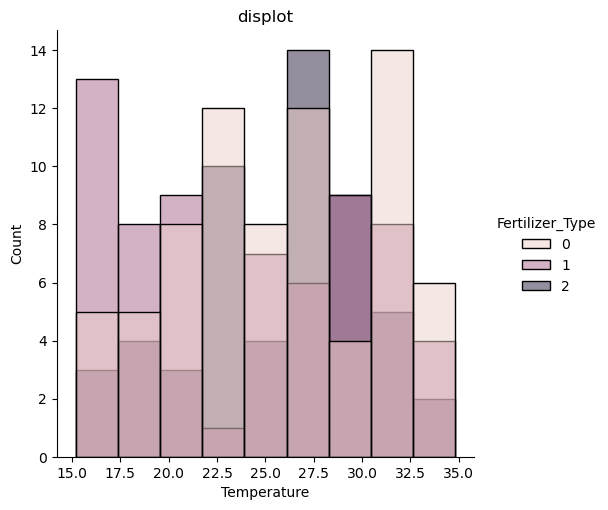

In [31]:
import seaborn as sns
sns.displot(x='Temperature', hue='Fertilizer_Type', data=df)
plt.title('displot')
plt.show()

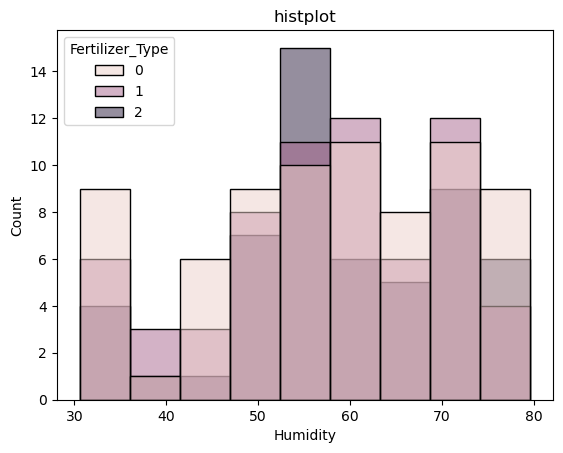

In [32]:
import seaborn as sns
sns.histplot(x='Humidity', hue='Fertilizer_Type', data=df)
plt.title('histplot')
plt.show()

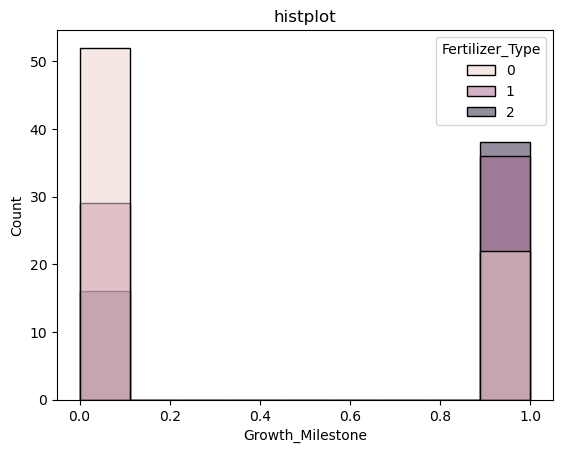

In [33]:
import seaborn as sns
sns.histplot(x='Growth_Milestone', hue='Fertilizer_Type', data=df)
plt.title('histplot')
plt.show()

# Correlaion using Heatmap


In [34]:
df[['Soil_Type', 'Sunlight_Hours', 'Water_Frequency', 'Fertilizer_Type',
       'Temperature', 'Humidity', 'Growth_Milestone']].corr()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
Soil_Type,1.000000,-0.222516,-0.133406,0.019482,-0.026519,-0.069916,0.094949
Sunlight_Hours,-0.222516,1.000000,0.156982,-0.060622,-0.100628,-0.052482,-0.122212
Water_Frequency,-0.133406,0.156982,1.000000,-0.035347,-0.087258,0.047026,-0.019295
Fertilizer_Type,0.019482,-0.060622,-0.035347,1.000000,-0.013099,0.042468,0.332892
Temperature,-0.026519,-0.100628,-0.087258,-0.013099,1.000000,0.117648,-0.053577
Humidity,-0.069916,-0.052482,0.047026,0.042468,0.117648,1.000000,-0.130328
Growth_Milestone,0.094949,-0.122212,-0.019295,0.332892,-0.053577,-0.130328,1.000000


<Axes: >

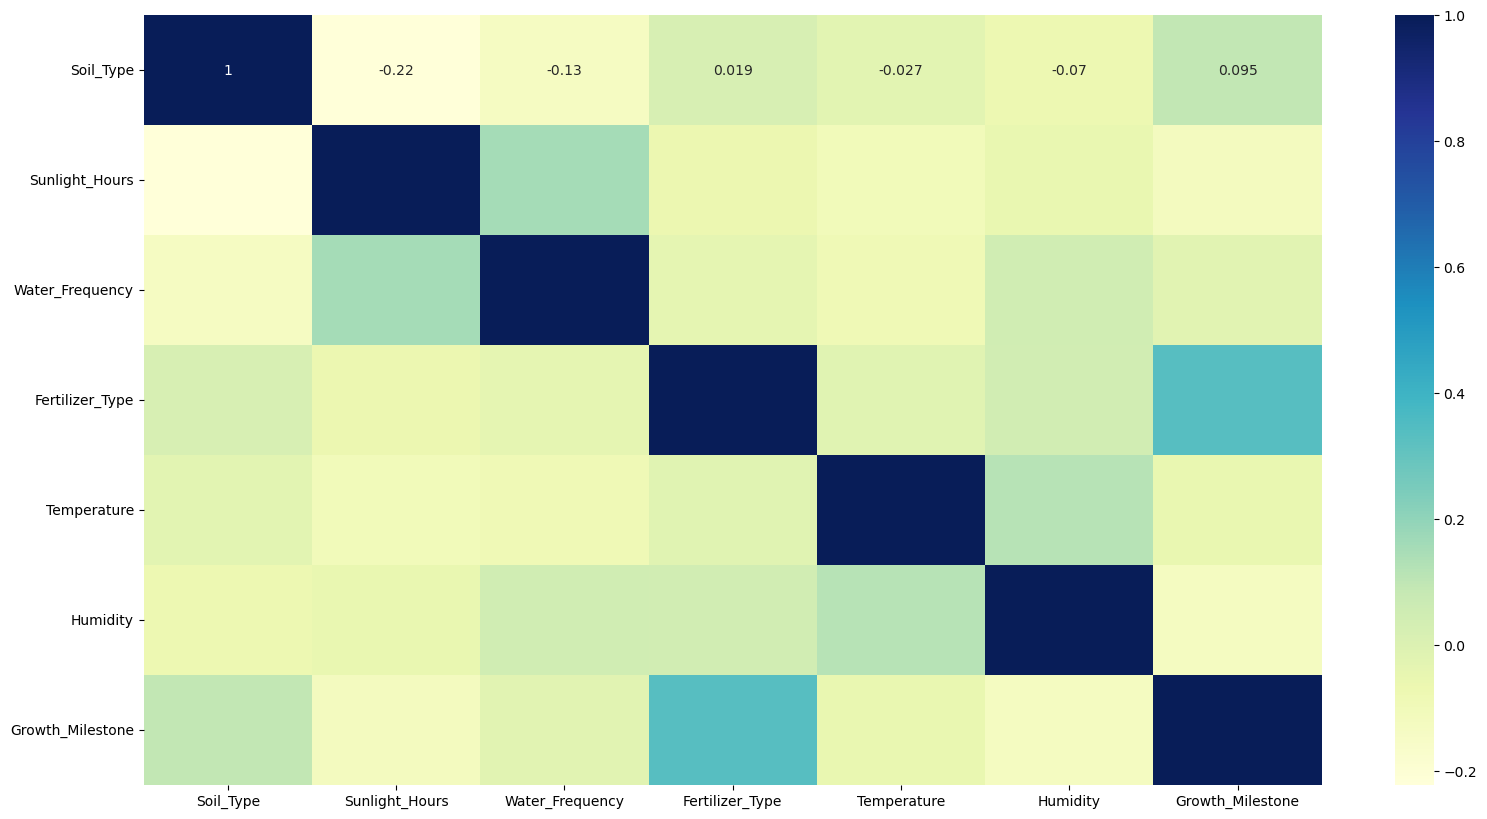

In [35]:
plt.figure(figsize=(19,10))
sns.heatmap(df[['Soil_Type', 'Sunlight_Hours', 'Water_Frequency', 'Fertilizer_Type',
       'Temperature', 'Humidity', 'Growth_Milestone']].corr(),cmap="YlGnBu",annot=True)

# Split Data


In [36]:
import pandas as pd
import numpy as np

In [37]:
X=df.drop('Growth_Milestone',axis=1)
y=df['Growth_Milestone']

print('Shape of X=',X.shape)
print('Shape of y=',y.shape)

Shape of X= (193, 6)
Shape of y= (193,)


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (154, 6)
Shape of y_train =  (154,)
Shape of X_test =  (39, 6)
Shape of y_test =  (39,)


In [39]:
df.columns

Index(['Soil_Type', 'Sunlight_Hours', 'Water_Frequency', 'Fertilizer_Type',
       'Temperature', 'Humidity', 'Growth_Milestone'],
      dtype='object')

In [41]:
X=df[['Soil_Type', 'Sunlight_Hours', 'Water_Frequency', 'Fertilizer_Type',
       'Temperature', 'Humidity', 'Growth_Milestone']]
y=df["Growth_Milestone"].values

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [43]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

# Feature Scaling


In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
train_X = sc.transform(X_train)
test_X= sc.transform(X_test)

# Model Selection using Classifier


In [45]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import  RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [46]:
clf=LogisticRegression()
clf=RandomForestClassifier()
clf=SVC(probability=True)
clf=DecisionTreeClassifier

# LOGISTIC REGRESSION¶


In [47]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [48]:
clf.fit(X_train, y_train)

LogisticRegression()

# Accuracy of the model


In [49]:
clf.score(X_test,y_test)

0.6153846153846154

In [50]:
clf_predict=clf.predict(X_test)

In [51]:
y_test

23     1
123    1
35     1
10     0
48     0
2      0
130    0
29     1
89     1
160    0
184    0
127    1
12     1
14     1
106    1
3      0
6      1
25     0
57     0
65     1
53     0
125    1
45     1
118    0
171    1
66     1
9      1
44     0
112    1
13     1
166    0
108    1
128    0
142    0
122    0
152    0
156    0
158    0
100    1
Name: Growth_Milestone, dtype: int64

# Decision Tree


# Decision Tree Classification Model


In [53]:
clf=DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier()

# Accuracy of the model


In [54]:
clf.score(X_test, y_test)

0.38461538461538464

In [55]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [56]:
y_test

23     1
123    1
35     1
10     0
48     0
2      0
130    0
29     1
89     1
160    0
184    0
127    1
12     1
14     1
106    1
3      0
6      1
25     0
57     0
65     1
53     0
125    1
45     1
118    0
171    1
66     1
9      1
44     0
112    1
13     1
166    0
108    1
128    0
142    0
122    0
152    0
156    0
158    0
100    1
Name: Growth_Milestone, dtype: int64

# Using entropy train the model of the DecisionTreeClassifier¶

In [57]:
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

# Accuracy of the model


In [58]:
clf_entropy.score(X_test, y_test)

0.5897435897435898

In [59]:
classificationModel_d_predicted=clf_entropy.predict(X_test)

In [60]:
y_test

23     1
123    1
35     1
10     0
48     0
2      0
130    0
29     1
89     1
160    0
184    0
127    1
12     1
14     1
106    1
3      0
6      1
25     0
57     0
65     1
53     0
125    1
45     1
118    0
171    1
66     1
9      1
44     0
112    1
13     1
166    0
108    1
128    0
142    0
122    0
152    0
156    0
158    0
100    1
Name: Growth_Milestone, dtype: int64

# RANDOM FOREST¶


In [61]:
clf=RandomForestClassifier(n_estimators=100,criterion='gini')
clf.fit(X_train,y_train)

RandomForestClassifier()

In [62]:
clf.score(X_test,y_test)

0.6153846153846154

# k-fold cross validation


In [63]:
from sklearn.model_selection import KFold

In [64]:
y_test

23     1
123    1
35     1
10     0
48     0
2      0
130    0
29     1
89     1
160    0
184    0
127    1
12     1
14     1
106    1
3      0
6      1
25     0
57     0
65     1
53     0
125    1
45     1
118    0
171    1
66     1
9      1
44     0
112    1
13     1
166    0
108    1
128    0
142    0
122    0
152    0
156    0
158    0
100    1
Name: Growth_Milestone, dtype: int64

# With criterion entropy in random Forest Classifier


In [65]:
clf_entropy=RandomForestClassifier(n_estimators=100,criterion='entropy')
clf_entropy.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

# Accuracy of the Model


In [66]:
clf_entropy.score(X_test,y_test)

0.6410256410256411

In [67]:
clf_predict=clf_entropy.predict(X_test)

In [68]:
clf_entropy.score(X_test,y_test)

0.6410256410256411

In [69]:
clf_predict=clf_entropy.predict(X_test)

In [70]:
y_test

23     1
123    1
35     1
10     0
48     0
2      0
130    0
29     1
89     1
160    0
184    0
127    1
12     1
14     1
106    1
3      0
6      1
25     0
57     0
65     1
53     0
125    1
45     1
118    0
171    1
66     1
9      1
44     0
112    1
13     1
166    0
108    1
128    0
142    0
122    0
152    0
156    0
158    0
100    1
Name: Growth_Milestone, dtype: int64

# ConfusionMatrix


In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [72]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score

In [73]:
y_pred = clf_entropy.predict(X_test)

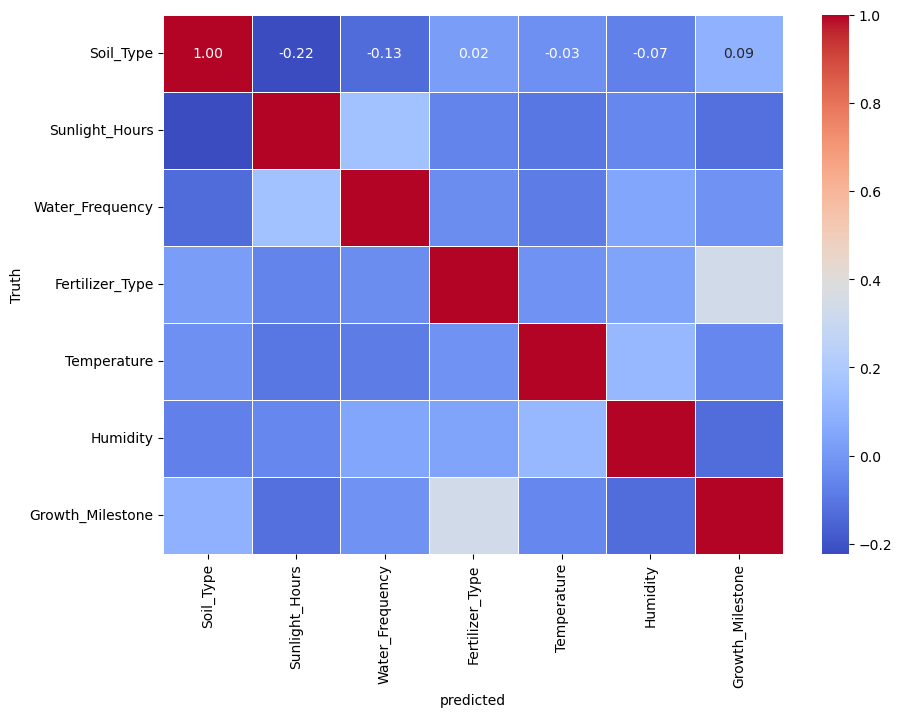

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths=0.7,cmap="coolwarm")
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.show()

In [75]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)

Accuracy : 0.6410256410256411


In [76]:
p=precision_score(y_test,y_pred,average='macro')
print("precision :",p)

precision : 0.6417112299465241


In [77]:
r=recall_score(y_test, y_pred, average='macro')
print("Recall :",r)

Recall : 0.6394736842105263


In [78]:
f=f1_score(y_test,y_pred,average='macro')
print("f1   :",f)

f1   : 0.638888888888889


# Support Vector machine Classifier


In [79]:
from sklearn.svm import SVC

In [80]:
classification_rbf=SVC(kernel='rbf')
classification_rbf.fit(X_train,y_train)

SVC()

In [81]:
classification_rbf.score(X_test,y_test)

0.4358974358974359

# Using feature Scaling**


In [82]:
classification_rbf_2=SVC(kernel='rbf')
classification_rbf_2.fit(X_train,y_train)

classification_rbf_2.score(X_test,y_test)

0.4358974358974359

# K Nearest Neighbors classifier


In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=7)

In [84]:
len(X_train)

154

In [85]:
len(X_test)

39

In [86]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [87]:
knn.score(X_test,y_test)

0.5128205128205128

# Navive Bayes


In [88]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()

In [89]:
model.fit(X_train ,y_train)

GaussianNB()

In [90]:
model.score(X_test,y_test)

0.6153846153846154

# Calculate the score using cross validation

In [94]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [95]:
for train_index,test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index,test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [96]:
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [98]:
get_score(LogisticRegression(),X_train,X_test,y_train,y_test)

0.6153846153846154

In [99]:
get_score(RandomForestClassifier(),X_train,X_test,y_train,y_test)

0.6410256410256411

In [100]:
get_score(DecisionTreeClassifier(),X_train,X_test,y_train,y_test)

0.41025641025641024

In [101]:
get_score(SVC(),X_train,X_test,y_train,y_test)

0.4358974358974359